# rMATS Alternative Splicing Analysis Results in Pediatric AML

### Comparisons: 
#### HS Cells - 
* Ped AML vs PedNL
* Ped AML vs Adult AML
* Ped AML vs sAML

#### Progenitors - 
* Ped AML vs PedNL
* Ped AML vs Adult AML
* Ped AML vs sAML

### Alternative Splicing Event Types :
* Retained Intron (RI)
* Skipped Exon (SE)
* Mutually Exclusive Exon (MXE)
* Alternative 5' Splice Site (A5SS)
* Alternative 3' Splice Site (A3SS)

### Analysis Files:
* Using Junction Counts and Exon Counts (JCEC)


In [1]:
library(ggpubr)
library(IRdisplay)
library(limma)
library(RColorBrewer)
library(gplots)
library(Homo.sapiens)
library(reshape2)
library(dplyr)
library(plyr)
ENS2EG <- toTable(org.Hs.egENSEMBL2EG)
EG2SYM <- toTable(org.Hs.egSYMBOL2EG)
ENS2EG2SYM <- data.frame(gene_id=ENS2EG$gene_id, ens_id=ENS2EG, 
                         SYM=EG2SYM[match(ENS2EG$gene_id,EG2SYM$gene_id),"symbol"])


Loading required package: ggplot2

Warning message:
“package ‘IRdisplay’ was built under R version 4.1.0”

Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following object is masked from ‘package:limma’:

    plotMA


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, 

In [2]:
meta2 <- read.csv("../../RNASeqAnalysis/data/DeWerf_Jamieson_PediatricAMLmetadata_02282020.csv", stringsAsFactors=FALSE, header=TRUE)

meta2.Prog.filt <- meta2[meta2$Cell.type %in% "Prog",]
meta2.Prog.filt$Phenotype <- factor(as.character(meta2.Prog.filt$X), levels=c("PedAML", "AdultAML", "PedNL"))
                         
meta2.Stem.filt <- meta2[meta2$Cell.type %in% "Stem",] 
meta2.Stem.filt$Phenotype <- factor(as.character(meta2.Stem.filt$X), levels=c("PedAML", "AdultAML", "PedNL"))


In [3]:
# HS and Progenitor Cells
HS.PedNLvsPedAML.JCEC <- HS.AdultAMLvsPedAML.JCEC <- Prog.AdultAMLvsPedAML.JCEC <-  
Prog.PedNLvsPedAML.JCEC <- PedAML.ProgvsStem.JCEC <- list() 
for(i in c("A5SS", "A3SS", "RI", "MXE", "SE")) {
        HS.PedNLvsPedAML.JCEC[[i]] <- read.table(file=paste0("../data/rMATS_PedAMLvPedNL_Stem/", i, ".MATS.JCEC.txt"),
                                        sep="\t", header=TRUE, stringsAsFactors=FALSE)
        HS.AdultAMLvsPedAML.JCEC[[i]] <- read.table(file=paste0("../data/rMATS_PedAMLvAdultAML_Stem/", i, ".MATS.JCEC.txt"),
                                        sep="\t", header=TRUE, stringsAsFactors=FALSE)
        Prog.PedNLvsPedAML.JCEC[[i]] <- read.table(file=paste0("../data/rMATS_PedAMLvPedNL_Prog/", i, ".MATS.JCEC.txt"),
                                       sep="\t", header=TRUE, stringsAsFactors=FALSE)
        Prog.AdultAMLvsPedAML.JCEC[[i]] <- read.table(file=paste0("../data/rMATS_PedAMLvAdultAML_Prog/", i, ".MATS.JCEC.txt"),
                                        sep="\t", header=TRUE, stringsAsFactors=FALSE)
}
    


In [4]:
HS.sAMLvsPedAML.JCEC <- Prog.sAMLvsPedAML.JCEC <- list() 
for(i in c("A5SS", "A3SS", "RI", "MXE", "SE")) {
        HS.sAMLvsPedAML.JCEC[[i]] <- read.table(file=paste0("../data/rMATS_Comp_Stem_PedAML_sAML/", i, ".MATS.JCEC.txt"),
                                        sep="\t", header=TRUE, stringsAsFactors=FALSE)
        Prog.sAMLvsPedAML.JCEC[[i]] <- read.table(file=paste0("../data/rMATS_Comp_Prog_PedAML_sAML/", i, ".MATS.JCEC.txt"),
                                        sep="\t", header=TRUE, stringsAsFactors=FALSE)
}


In [5]:
PedAML_altsplice_genes <- lapply(list(HS.PedNLvsPedAML.JCEC, HS.AdultAMLvsPedAML.JCEC, 
                                      Prog.PedNLvsPedAML.JCEC, Prog.AdultAMLvsPedAML.JCEC), 
       function(x) lapply(x, function(y) {
           z <- y[y$FDR < 0.05,]
           unique(z$geneSymbol)
        }
))
names(PedAML_altsplice_genes) <- c("HS.PedNLvsPedAML", "HS.AdultAMLvsPedAML",
                                   "Prog.PedNLvsPedAML", "Prog.AdultAMLvsPedAML")
PedAML_altsplice_genes.df <- do.call(rbind, lapply(PedAML_altsplice_genes, function(x) unlist(lapply(x, length))))

PedAML_altsplice_genes.df
names(PedAML_altsplice_genes[[1]]) <-  names(PedAML_altsplice_genes[[2]]) <- names(PedAML_altsplice_genes[[3]]) <- 
           names(PedAML_altsplice_genes[[4]]) <- c("A5SS", "A3SS", "RI", "MXE", "SE")
PedAML.refgenelist <- unique(unlist(lapply(list(HS.PedNLvsPedAML.JCEC, HS.AdultAMLvsPedAML.JCEC, 
                                                  Prog.PedNLvsPedAML.JCEC, Prog.AdultAMLvsPedAML.JCEC), 
       function(x) unlist(lapply(x, function(y) {
           unique(y$geneSymbol)
        }
)))))

,A5SS,A3SS,RI,MXE,SE
HS.PedNLvsPedAML,549,763,779,1205,3941
HS.AdultAMLvsPedAML,455,613,662,906,3858
Prog.PedNLvsPedAML,580,699,655,1621,4867
Prog.AdultAMLvsPedAML,497,621,644,1128,4134


In [6]:
PedAML_altsplice_events <- lapply(list(HS.PedNLvsPedAML.JCEC, HS.AdultAMLvsPedAML.JCEC, HS.sAMLvsPedAML.JCEC, 
                                      Prog.PedNLvsPedAML.JCEC, Prog.AdultAMLvsPedAML.JCEC, Prog.sAMLvsPedAML.JCEC), 
       function(x) lapply(x, function(y) {
           y[y$FDR < 0.05,]
       }
))
names(PedAML_altsplice_events) <- c("HS.PedNLvsPedAML", "HS.AdultAMLvsPedAML", "HS.sAMLvsPedAML", 
                                   "Prog.PedNLvsPedAML", "Prog.AdultAMLvsPedAML", "Prog.sAMLvsPedAML")
                                  
PedAML_altsplice_events_PSI <- lapply(list(HS.PedNLvsPedAML.JCEC, HS.AdultAMLvsPedAML.JCEC, HS.sAMLvsPedAML.JCEC,
                                          Prog.PedNLvsPedAML.JCEC, Prog.AdultAMLvsPedAML.JCEC, Prog.sAMLvsPedAML.JCEC), 
       function(x) lapply(x, function(y) {
           y[y$FDR < 0.05 & abs(y$IncLevelDifference) > 0.05,]
        }
))
names(PedAML_altsplice_events_PSI) <- c("HS.PedNLvsPedAML", "HS.AdultAMLvsPedAML", "HS.sAMLvsPedAML",
                                       "Prog.PedNLvsPedAML", "Prog.AdultAMLvsPedAML", "Prog.sAMLvsPedAML")

## Fig 3d,g & S3h - Barplot Input

In [7]:
Stem_PedAML_altsplice_events <- lapply(list(HS.PedNLvsPedAML.JCEC, HS.AdultAMLvsPedAML.JCEC, HS.sAMLvsPedAML.JCEC), function(x) lapply(x, function(y) {
    y[y$FDR < 0.05,]
}))
names(Stem_PedAML_altsplice_events) <- c("HS.PedNLvsPedAML", "HS.AdultAMLvsPedAML", "HS.sAMLvsPedAML")
Stem_PedAML_altsplice_events.df <- do.call(rbind, lapply(Stem_PedAML_altsplice_events, function(x) unlist(lapply(x, nrow))))
names(Stem_PedAML_altsplice_events[[1]]) <-  names(Stem_PedAML_altsplice_events[[2]]) <- names(Stem_PedAML_altsplice_events[[3]]) <- 
           c("A5SS", "A3SS", "RI", "MXE", "SE")
                                                         
Stem_PedAML_PSI_altsplice_events <- lapply(list(HS.PedNLvsPedAML.JCEC, HS.AdultAMLvsPedAML.JCEC, HS.sAMLvsPedAML.JCEC), function(x) lapply(x, function(y) {
    y[y$FDR < 0.05 & abs(y$IncLevelDifference) > 0.1,]
}))
names(Stem_PedAML_PSI_altsplice_events) <- c("HS.PedNLvsPedAML", "HS.AdultAMLvsPedAML", "HS.sAMLvsPedAML")
Stem_PedAML_PSI_altsplice_events.df <- do.call(rbind, lapply(Stem_PedAML_PSI_altsplice_events, function(x) unlist(lapply(x, nrow))))
Stem_PedAML_PSI_altsplice_events.df


,A5SS,A3SS,RI,MXE,SE
HS.PedNLvsPedAML,203,287,400,772,2097
HS.AdultAMLvsPedAML,185,255,299,520,2596
HS.sAMLvsPedAML,123,120,179,918,1765


In [9]:
sample_order_prog <- c("05x00047", "06pid25376", "06x00077", "18x10720", "02pid24760", "04pid24474", 
                       "02id38", "06id90", "04id78", "06id00066", "01x00077", "03x11379", "14x12488", "15x12584", "17x12451")
sample_order_stem <- c("01pid24760ct", "03pid24474", "05pid25376", "01id38cell", "05id90", "03id78cellHSC",
                       "05id00066", "02x11379x", "04x00068", "12x12484", "13x12488", "16x12451")

## Fig 3e - Pie Chart Input

In [11]:
PedAML_altsplice_percent_dir <- lapply(list(HS.PedNLvsPedAML.JCEC), 
       function(x) lapply(x, function(y) {
           z1 <- y[y$FDR < 0.05 & y$IncLevelDifference > 0,]
           z2 <- y[y$FDR < 0.05 & y$IncLevelDifference < 0,]
           a1 <- 100*(nrow(z1)/nrow(y))
           a2 <- 100*(nrow(z2)/nrow(y))
           c(nrow(z1), nrow(z2))
        }
))
names(PedAML_altsplice_percent_dir) <- c("HS.PedNLvsPedAML")
PedAML_altsplice_percent_dir.df <- do.call(rbind, lapply(PedAML_altsplice_percent_dir, unlist))
PedAML_altsplice_percent_dir.df[,-c(1:8)]
                                       


SE1  SE2 
4587 3227

In [12]:
PedAML_altsplice_heatmap.inp <- lapply(list(HS.PedNLvsPedAML.JCEC, HS.AdultAMLvsPedAML.JCEC, 
                                            Prog.PedNLvsPedAML.JCEC, Prog.AdultAMLvsPedAML.JCEC), 
       function(x) lapply(x, function(y) {
           z <- y[order(y$FDR, decreasing=FALSE),][1:200,]
           out.df <- suppressWarnings(do.call(rbind.data.frame, lapply(1:nrow(z), function(x)  {
                as.numeric(as.character(c(unlist(strsplit(z$IncLevel1[x], split=",")[[1]]),
                unlist(strsplit(z$IncLevel2[x], split=",")[[1]]))))
            })))
           rownames(out.df) <- z$ID
           return(out.df)
        }
))
colnames(PedAML_altsplice_heatmap.inp[[1]][[5]]) <- colnames(PedAML_altsplice_heatmap.inp[[1]][[3]]) <- sample_order_stem
colnames(PedAML_altsplice_heatmap.inp[[3]][[5]]) <- colnames(PedAML_altsplice_heatmap.inp[[3]][[3]]) <- sample_order_prog

## Figure 3f - Heatmap

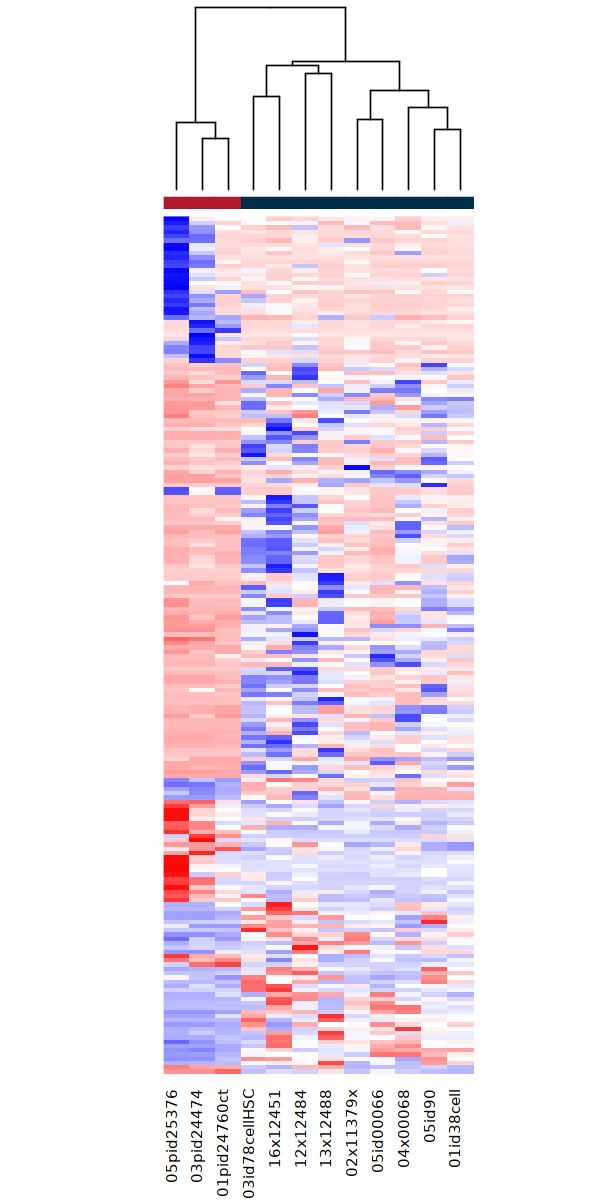

In [13]:
group_col <- c(rep("#B2182B", 3), rep("#003049", 9))
mycol = colorpanel(1000, "blue", "white", "red")

options(repr.plot.width=5, repr.plot.height=10)
PedAMLvPedNL_Stem_SE_heatmap <- heatmap.2(as.matrix(PedAML_altsplice_heatmap.inp[[1]][[5]]), scale="row", labRow="", 
                 labCol=colnames(PedAML_altsplice_heatmap.inp[[1]][[5]]), # May need to change to represent variable containing sample name
                 ColSideColors=group_col,
                 col=mycol, trace="none", density.info="none", dendrogram="column",
                 margin=c(8,8), lhei=c(2,10), key=FALSE) 


## Figure S3f - Heatmap

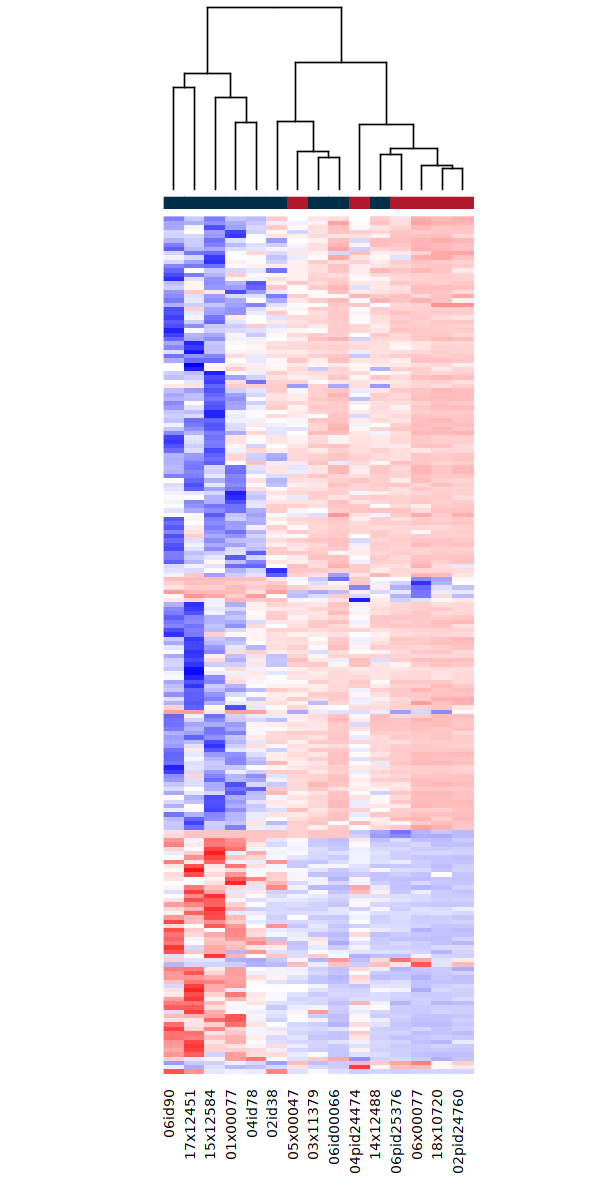

In [14]:
group_col <- c(rep("#B2182B", 6), rep("#003049", 9))
mycol = colorpanel(1000, "blue", "white", "red")

options(repr.plot.width=5, repr.plot.height=10)
PedAMLvPedNL_Prog_SE_heatmap <- heatmap.2(as.matrix(PedAML_altsplice_heatmap.inp[[3]][[5]]), scale="row", labRow="", 
                 labCol=colnames(PedAML_altsplice_heatmap.inp[[3]][[5]]), # May need to change to represent variable containing sample name
                 ColSideColors=group_col,
                 col=mycol, trace="none", density.info="none", dendrogram="column",
                 margin=c(8,8), lhei=c(2,10), key=FALSE) 


## Figure S3g

In [15]:
PedAML_altsplice_heatmap.inp <- lapply(list(HS.PedNLvsPedAML.JCEC, HS.AdultAMLvsPedAML.JCEC, HS.sAMLvsPedAML.JCEC,
                                        Prog.PedNLvsPedAML.JCEC, Prog.AdultAMLvsPedAML.JCEC, Prog.sAMLvsPedAML.JCEC), 
       function(x) lapply(x, function(y) {
           y2 <- y[abs(y$IncLevelDifference) > 0.1,]
           z <- y2[order(y2$FDR, decreasing=FALSE),][1:200,]
           out.df <- suppressWarnings(do.call(rbind.data.frame, lapply(1:nrow(z), function(x)  {
                as.numeric(as.character(c(unlist(strsplit(z$IncLevel1[x], split=",")[[1]]),
                unlist(strsplit(z$IncLevel2[x], split=",")[[1]]))))
            })))
           rownames(out.df) <- z$ID
           return(out.df)
        }
))
colnames(PedAML_altsplice_heatmap.inp[[1]][[5]]) <- colnames(PedAML_altsplice_heatmap.inp[[1]][[3]]) <- sample_order_stem
colnames(PedAML_altsplice_heatmap.inp[[4]][[5]]) <- colnames(PedAML_altsplice_heatmap.inp[[4]][[3]]) <- sample_order_prog

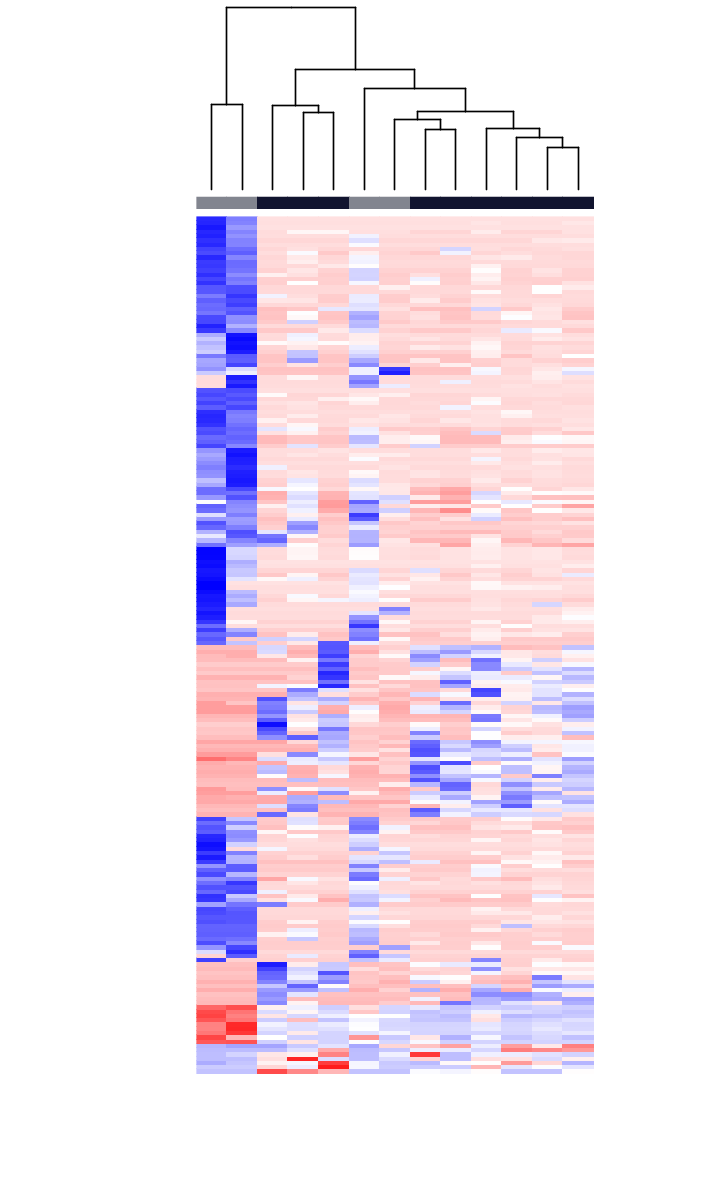

In [16]:
group_col <- c(rep("#82858F", 4), rep("#11142F", 9))
mycol = colorpanel(1000, "blue", "white", "red")

options(repr.plot.width=6, repr.plot.height=10)
PedAMLvPedNL_Stem_SE_heatmap <- heatmap.2(as.matrix(PedAML_altsplice_heatmap.inp[[2]][[5]]), scale="row", labRow="", 
                 labCol="", # May need to change to represent variable containing sample name
                 ColSideColors=group_col,
                 col=mycol, trace="none", density.info="none", dendrogram="column",
                 margin=c(8,8), lhei=c(2,10), key=FALSE) 


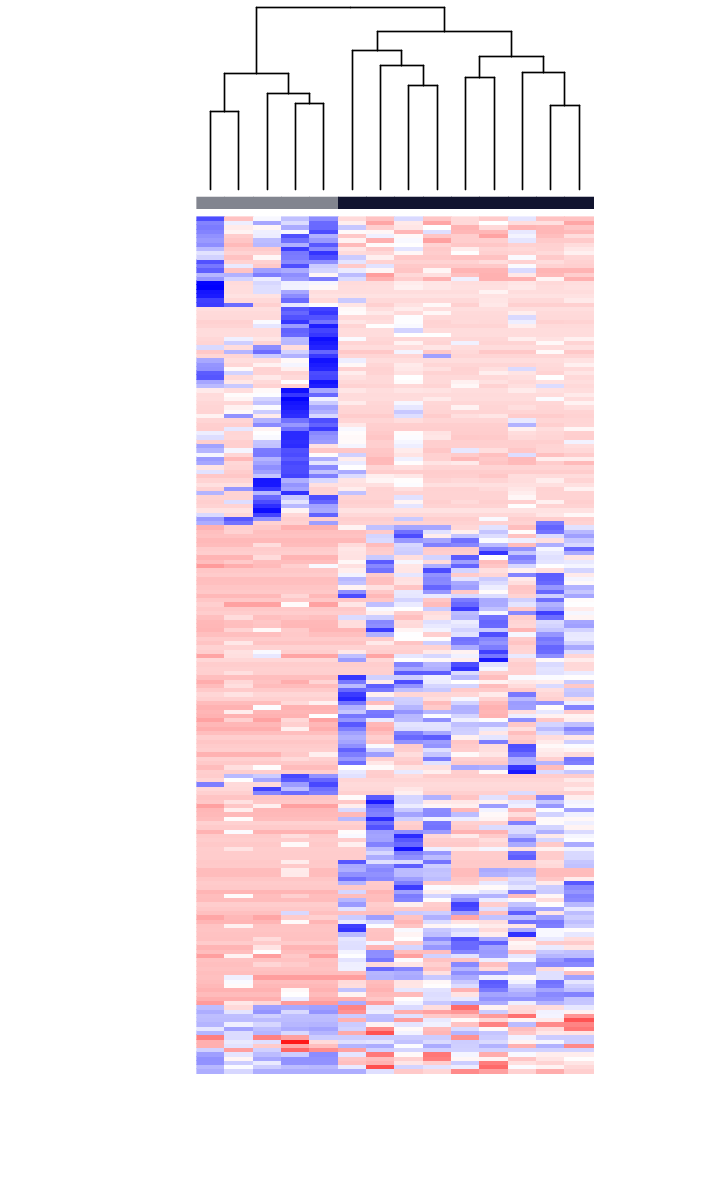

In [17]:
group_col <- c(rep("#82858F", 5), rep("#11142F", 9))
mycol = colorpanel(1000, "blue", "white", "red")

options(repr.plot.width=6, repr.plot.height=10)
PedAMLvPedNL_Stem_SE_heatmap <- heatmap.2(as.matrix(PedAML_altsplice_heatmap.inp[[5]][[5]]), scale="row", labRow="", 
                 labCol="", # May need to change to represent variable containing sample name
                 ColSideColors=group_col,
                 col=mycol, trace="none", density.info="none", dendrogram="column",
                 margin=c(8,8), lhei=c(2,10), key=FALSE) 


In [18]:
d <- dir(path="../data//SpliceosomeDB_lists/", full.names = TRUE)
d2 <-  dir(path="../data/Notebooks/SpliceosomeDB_lists/")

In [22]:
PedNL_Stem_samp <- c("01pid24760ctHSC","03pid24474ctHSC","05pid25376ctHSC")
PedNL_Prog_samp <- c("05x00047xPLUSPLUS","06pid25376ctHPC","06x00077xPLUSPLUS", "18x10720xPLUSPLUS","02pid24760ctHPC","04pid24474ctHPC")
PedAML_Stem_samp <- c("01id38cellHSC", "cell05id90HSC", "03id78cellHSC", "05id00066HSC", "02x11379xHSCxxxxx", 
                      "04x00068xPLUSMINS","12x12484xPLUSMINS","13x12488xPLUSMINS","16x12451xPLUSMINS")
PedAML_Prog_samp <- c("02id38cellPROGENITORS","06id90cellPROGENITORS","04id78cellPROGENITORS","06id00066PRO","01x00077xPROGENIT",
                      "03x11379xHPCxxxxx","14x12488xPLUSPLUS","15x12584xPLUSPLUS","17x12451xPLUSPLUS")

PedNL_PedAML_Prog_samp <- c(PedNL_Prog_samp, PedAML_Prog_samp)
PedNL_PedAML_Stem_samp <- c(PedNL_Stem_samp, PedAML_Stem_samp)
PedNL_PedAML_Prog_samp_meta <- meta2.Prog.filt[match(PedNL_PedAML_Prog_samp, meta2.Prog.filt$Sample), c("Patient.ID", "X")]
PedNL_PedAML_Stem_samp_meta <- meta2.Stem.filt[match(PedNL_PedAML_Stem_samp, meta2.Stem.filt$Sample), c("Patient.ID", "X")]


In [20]:
Stem_Events1 <- read.table(file="../data/Eventlist _Exon Inclusion_AdditionalStem_07242020.txt", sep="\t", header=TRUE)
Stem_RBFOX2_Events1 <- read.table(file="../data/Eventlist _Exon Inclusion_RBFOX2overlap_07242020.txt", sep="\t", header=TRUE)
Prog_RBFOX2_Events1 <- read.table(file="../data/Eventlist _Exon Inclusion_RBFOX2overlapProg_07242020.txt", sep="\t", header=TRUE)
PedAML_altsplice_events_Stem_Events1 <- lapply(PedAML_altsplice_events[1], 
       function(x) lapply(x[5], function(y) {
           rbind(y[y$geneSymbol %in% Stem_Events1$geneSymbol & 
             y$upstreamES %in% (Stem_Events1$Start1 -1) &  
             y$upstreamEE %in% Stem_Events1$End1,],
                 y[y$geneSymbol %in% Stem_Events1$geneSymbol & 
             y$downstreamES %in% (Stem_Events1$Start1 -1) &  
             y$downstreamEE %in% Stem_Events1$End1,])
        }
))
names(PedAML_altsplice_events_Stem_Events1) <- c("HS.PedNLvsPedAML")
                                               
PedAML_altsplice_events_Stem_RBFOX2_Events1 <- lapply(PedAML_altsplice_events[1], 
       function(x) lapply(x[5], function(y) {
           rbind(y[y$geneSymbol %in% Stem_RBFOX2_Events1$geneSymbol & 
             y$upstreamES %in% (Stem_RBFOX2_Events1$Start1 - 1) & 
             y$upstreamEE %in% Stem_RBFOX2_Events1$End1,],
           y[y$geneSymbol %in% Stem_RBFOX2_Events1$geneSymbol & 
             y$downstreamES %in% (Stem_RBFOX2_Events1$Start1 -1) &  
             y$downstreamEE %in% Stem_RBFOX2_Events1$End1,])
        }
))
names(PedAML_altsplice_events_Stem_RBFOX2_Events1) <- c("HS.PedNLvsPedAML")

PedAML_altsplice_events_Prog_RBFOX2_Events1 <- lapply(PedAML_altsplice_events[4], 
       function(x) lapply(x[5], function(y) {
           rbind(y[y$geneSymbol %in% Prog_RBFOX2_Events1$geneSymbol & 
             y$upstreamES %in% (Prog_RBFOX2_Events1$Start1 - 1) & 
             y$upstreamEE %in% Prog_RBFOX2_Events1$End1,],
           y[y$geneSymbol %in% Prog_RBFOX2_Events1$geneSymbol & 
             y$downstreamES %in% (Prog_RBFOX2_Events1$Start1 -1) &  
             y$downstreamEE %in% Prog_RBFOX2_Events1$End1,])
        }
))
names(PedAML_altsplice_events_Prog_RBFOX2_Events1) <- c("Prog.PedNLvsPedAML")

Stem_Events1_PedAMLvPedNL_SE <- PedAML_altsplice_events_Stem_Events1[[1]][[1]]                                                      
Stem_RBFOX2_Events1_PedAMLvPedNL_SE <- rbind(Stem_Events1_PedAMLvPedNL_SE, 
                                             PedAML_altsplice_events_Stem_RBFOX2_Events1[[1]][[1]])
Prog_RBFOX2_Events1_PedAMLvPedNL_SE <- PedAML_altsplice_events_Prog_RBFOX2_Events1[[1]][[1]]
                                                      dim(Prog_RBFOX2_Events1_PedAMLvPedNL_SE)
Stem_RBFOX2_Events1_PedAMLvPedNL_SE_mat <- cbind(do.call(rbind, lapply(Stem_RBFOX2_Events1_PedAMLvPedNL_SE$IncLevel1, function(x) as.numeric(unlist(strsplit(x, split=","))))), 
                                                  do.call(rbind, lapply(Stem_RBFOX2_Events1_PedAMLvPedNL_SE$IncLevel2, function(x) as.numeric(unlist(strsplit(x, split=","))))))

Prog_RBFOX2_Events1_PedAMLvPedNL_SE_mat <- cbind(do.call(rbind, lapply(Prog_RBFOX2_Events1_PedAMLvPedNL_SE$IncLevel1, function(x) as.numeric(unlist(strsplit(x, split=","))))), 
                                      do.call(rbind, lapply(Prog_RBFOX2_Events1_PedAMLvPedNL_SE$IncLevel2, function(x) as.numeric(unlist(strsplit(x, split=","))))))
                                                      

[1] 26 23

## Figure 5d (HSC)

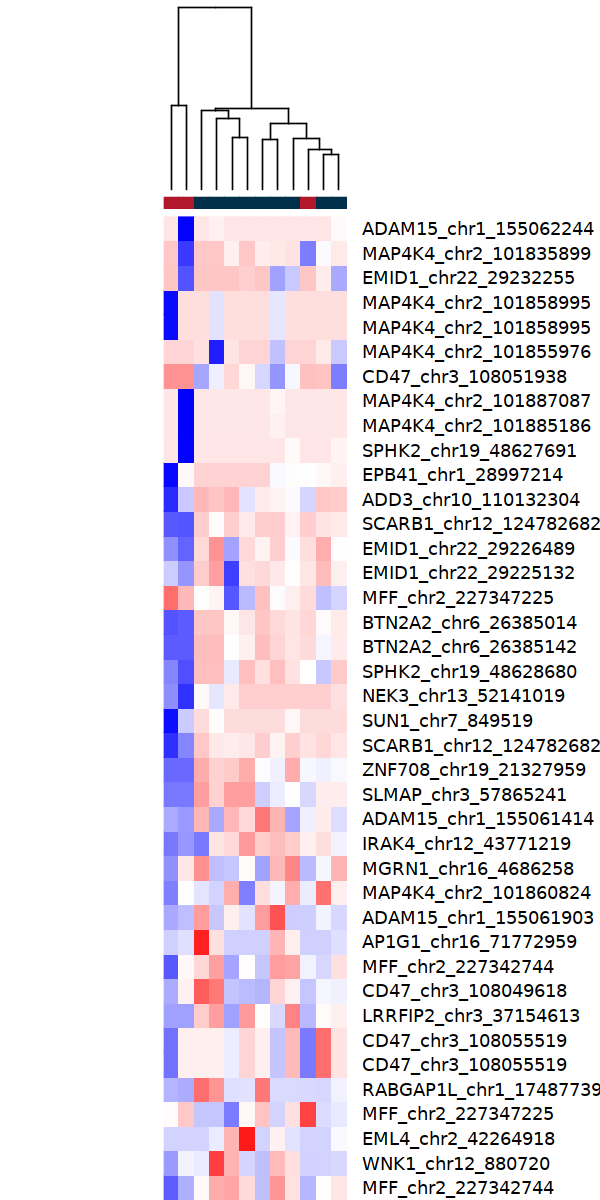

In [23]:
mycol = colorpanel(1000, "blue", "white", "red")
f <- as.factor(PedNL_PedAML_Stem_samp_meta$X)
group_col = as.character(c("#003049","#B2182B")[f])

tmp.Stem_RBFOX2_Events1_PedAMLvPedNL_SE <- paste(Stem_RBFOX2_Events1_PedAMLvPedNL_SE$geneSymbol, 
                                                 Stem_RBFOX2_Events1_PedAMLvPedNL_SE$chr, 
                                                 Stem_RBFOX2_Events1_PedAMLvPedNL_SE$exonStart_0base, sep="_")
options(repr.plot.width=5, repr.plot.height=10)
heatmap.2(Stem_RBFOX2_Events1_PedAMLvPedNL_SE_mat, labRow=tmp.Stem_RBFOX2_Events1_PedAMLvPedNL_SE, 
                 labCol=PedNL_PedAML_Stem_samp_meta$Patient.ID, # May need to change to represent variable containing sample name
                 ColSideColors=group_col, scale="row", 
                 col=mycol, trace="none", density.info="none", dendrogram="column",
                 margin=c(0,16), lhei=c(2,10), key=FALSE, cexRow=1.3)  


## Figure 5d (HPC)

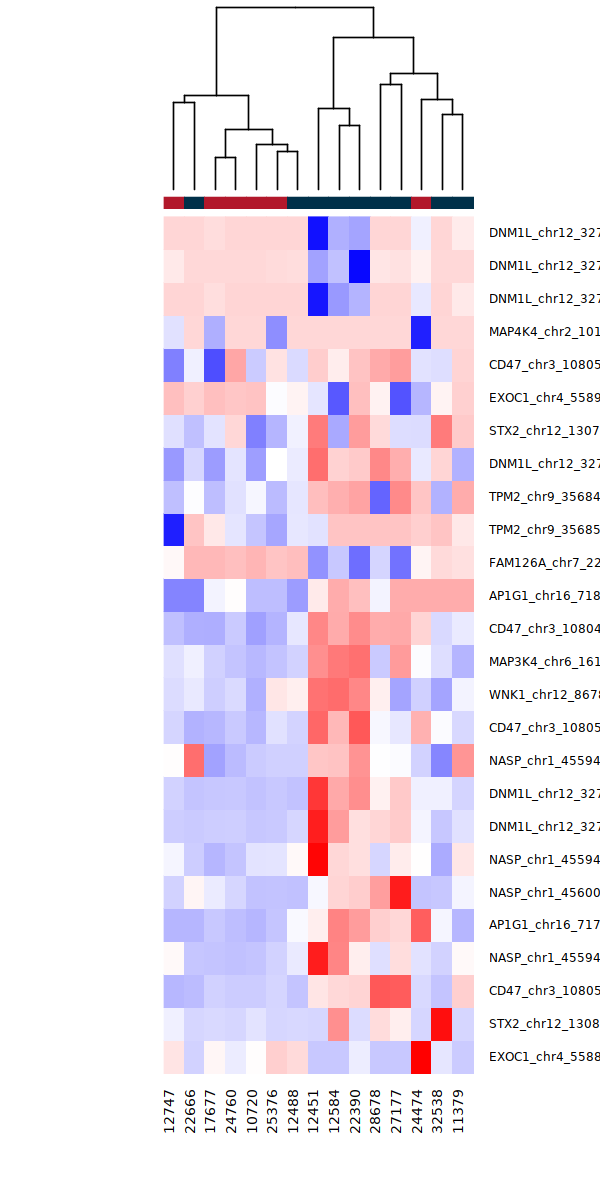

In [25]:
mycol = colorpanel(1000, "blue", "white", "red")
f <- as.factor(PedNL_PedAML_Prog_samp_meta$X)
group_col = as.character(c("#003049","#B2182B")[f])

tmp.Prog_RBFOX2_Events1_PedAMLvPedNL_SE <- paste(Prog_RBFOX2_Events1_PedAMLvPedNL_SE$geneSymbol, 
                                                 Prog_RBFOX2_Events1_PedAMLvPedNL_SE$chr, 
                                                 Prog_RBFOX2_Events1_PedAMLvPedNL_SE$exonStart_0base, sep="_")

options(repr.plot.width=5, repr.plot.height=10)
heatmap.2(Prog_RBFOX2_Events1_PedAMLvPedNL_SE_mat, labRow=tmp.Prog_RBFOX2_Events1_PedAMLvPedNL_SE, 
                 labCol=PedNL_PedAML_Prog_samp_meta$Patient.ID, # May need to change to represent variable containing sample name
                 ColSideColors=group_col, scale="row", 
                 col=mycol, trace="none", density.info="none", dendrogram="column",
                 margin=c(8,8), lhei=c(2,10), key=FALSE)  

### RBFOX2 Target Analysis 

In [26]:
RBFOX2_omics_targets <- read.table(file="../data/RBFOX2_targetgenes_eCLIP_ChIP_RNA_analysis.txt", 
                                   sep="\t", stringsAsFactors = FALSE, header=TRUE)


In [27]:
RBFOX2.target.DiffSplicing <- read.csv(file="../data/oRNAment_RBFOX2.csv", header=TRUE, stringsAsFactors=FALSE)

RBFOX2.target.DiffSplicing$external_gene_name <- recode(RBFOX2.target.DiffSplicing$external_gene_name, 
                                                       `2-Sep`='SEPT2', `3-Sep`='SEPT3',`5-Sep`='SEPT5', 
                                                        `6-Sep`='SEPT6', `7-Sep`='SEPT7', `8-Sep`='SEPT8',
                                                        `9-Sep`='SEPT9',`11-Sep`='SEPT11',
                                                       `2-Mar`='MARCH2', `3-Mar`='MARCH3', `5-Mar`='MARCH5',
                                                       `8-Mar`='MARCH8', `9-Mar`='MARCH9')
RBFOX2.target.DiffSplicing.pc <- subset(RBFOX2.target.DiffSplicing, gene_biotype == "protein_coding" & 
                                     transcript_biotype == "protein_coding")
RBFOX2.target.DiffSpl.pc.0.7 <- subset(RBFOX2.target.DiffSplicing.pc, score > 0.7)
RBFOX2.target.DiffSpl.pc.0.8 <- subset(RBFOX2.target.DiffSplicing.pc, score > 0.8)
RBFOX2.target.DiffSpl.pc.1 <- subset(RBFOX2.target.DiffSplicing.pc, score == 1)

RBFOX2.target.DiffSpl.pc.0.7.col <- RBFOX2.target.DiffSpl.pc.0.7 %>% group_by(external_gene_name) %>% 
    arrange(score) %>% dplyr::summarise(scores  = paste(score, collapse =","), times = length(score))  
RBFOX2.target.DiffSpl.pc.0.8.col <- RBFOX2.target.DiffSpl.pc.0.8 %>% group_by(external_gene_name) %>% 
    arrange(score) %>% dplyr::summarise(scores  = paste(score, collapse =","), times = length(score))  
RBFOX2.target.DiffSpl.pc.1.col <- RBFOX2.target.DiffSpl.pc.1 %>% group_by(external_gene_name) %>% 
    arrange(score) %>% dplyr::summarise(scores  = paste(score, collapse =","), times = length(score))  

RBFOX2.target.DiffSplicing.ri <- subset(RBFOX2.target.DiffSplicing, gene_biotype == "protein_coding" & 
                                     transcript_biotype == "retained_intron")
RBFOX2.target.DiffSpl.ri.0.7 <- subset(RBFOX2.target.DiffSplicing.ri, score > 0.7) 
RBFOX2.target.DiffSpl.ri.0.8 <- subset(RBFOX2.target.DiffSplicing.ri, score > 0.8)
RBFOX2.target.DiffSpl.ri.1 <- subset(RBFOX2.target.DiffSplicing.ri, score == 1)

RBFOX2.target.DiffSpl.ri.0.7.col <- RBFOX2.target.DiffSpl.ri.0.7 %>% group_by(external_gene_name) %>% 
    arrange(score) %>% dplyr::summarise(scores  = paste(score, collapse =","), times = length(score))  
RBFOX2.target.DiffSpl.ri.0.8.col <- RBFOX2.target.DiffSpl.ri.0.8 %>% group_by(external_gene_name) %>% 
    arrange(score) %>% dplyr::summarise(scores  = paste(score, collapse =","), times = length(score))  
RBFOX2.target.DiffSpl.ri.1.col <- RBFOX2.target.DiffSpl.ri.1 %>% group_by(external_gene_name) %>% 
    arrange(score) %>% dplyr::summarise(scores  = paste(score, collapse =","), times = length(score))  


In [28]:
RBFOX2_comb_targets_union <- unique(c(RBFOX2_omics_targets$Gene, RBFOX2.target.DiffSpl.pc.0.7.col$external_gene_name))
RBFOX2_comb_targets <- unique(RBFOX2_omics_targets$Gene[RBFOX2_omics_targets$Gene %in% RBFOX2.target.DiffSpl.pc.0.7.col$external_gene_name])


## Fig 5c - Volcano Plot

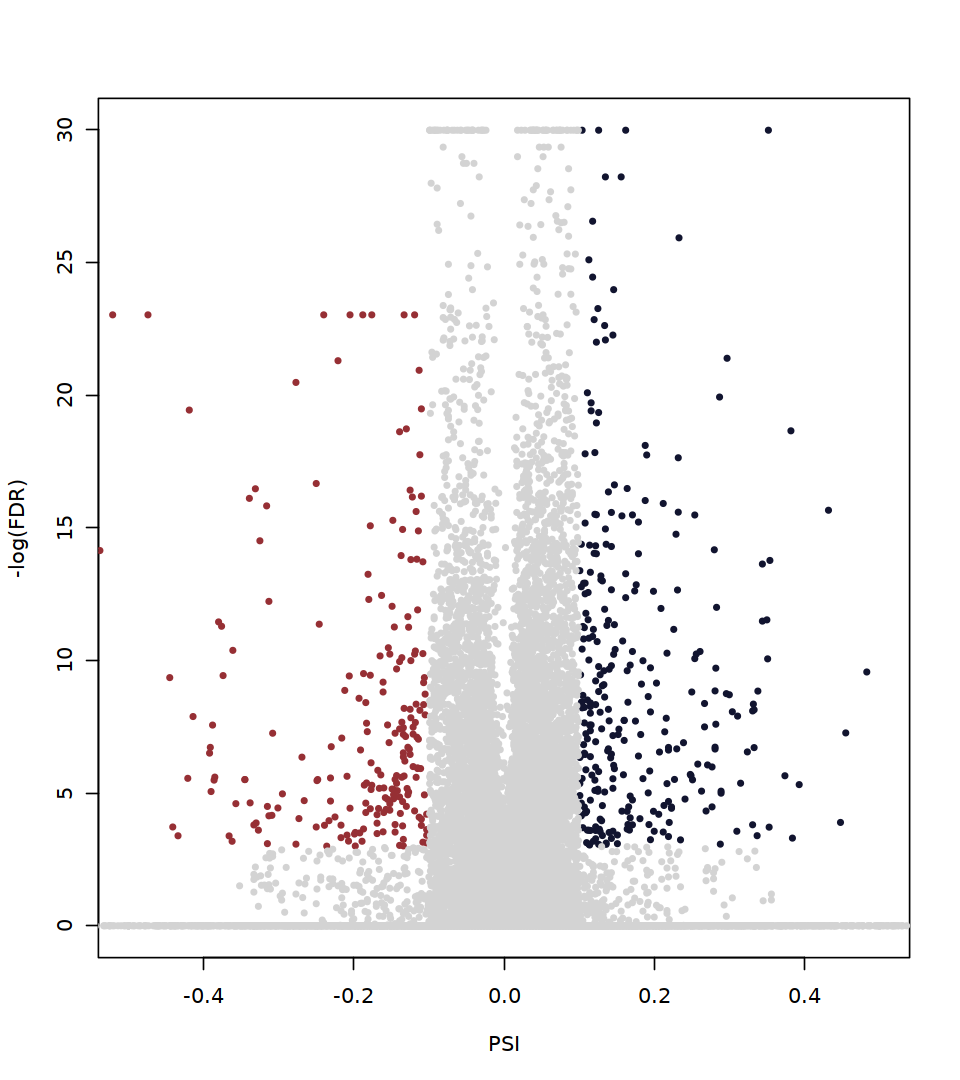

In [29]:
vol_plot_inp <- list(sig_up=HS.PedNLvsPedAML.JCEC[[5]][HS.PedNLvsPedAML.JCEC[[5]]$geneSymbol %in% 
                                                               RBFOX2_comb_targets &
HS.PedNLvsPedAML.JCEC[[5]]$FDR < 0.05 & HS.PedNLvsPedAML.JCEC[[5]]$IncLevelDifference > 0.1,],
                     sig_down=HS.PedNLvsPedAML.JCEC[[5]][HS.PedNLvsPedAML.JCEC[[5]]$geneSymbol %in% 
                                                               RBFOX2_comb_targets &
HS.PedNLvsPedAML.JCEC[[5]]$FDR < 0.05 & HS.PedNLvsPedAML.JCEC[[5]]$IncLevelDifference < -0.1,],
                notsig=HS.PedNLvsPedAML.JCEC[[5]][HS.PedNLvsPedAML.JCEC[[5]]$geneSymbol %in% 
                                                               RBFOX2_comb_targets &
HS.PedNLvsPedAML.JCEC[[5]]$FDR > 0.05 | abs(HS.PedNLvsPedAML.JCEC[[5]]$IncLevelDifference) < 0.1,])
vol_plot_inp[[1]]$FDR[vol_plot_inp[[1]]$FDR==0] <- min(vol_plot_inp[[1]]$FDR[vol_plot_inp[[1]]$FDR!=0])
vol_plot_inp[[2]]$FDR[vol_plot_inp[[2]]$FDR==0] <- min(vol_plot_inp[[2]]$FDR[vol_plot_inp[[2]]$FDR!=0])
vol_plot_inp[[3]]$FDR[vol_plot_inp[[3]]$FDR==0] <- min(vol_plot_inp[[3]]$FDR[vol_plot_inp[[3]]$FDR!=0])
options(repr.plot.width=8, repr.plot.height=9)
plot(vol_plot_inp[[1]]$IncLevelDifference, -log(vol_plot_inp[[1]]$FDR), pch=19, cex=0.5, 
     ylim=c(0, max(c(-log(vol_plot_inp[[1]]$FDR), -log(vol_plot_inp[[2]]$FDR)))), 
            col="#11142F", xlab="PSI", ylab="-log(FDR)", xlim=c(-0.5, 0.5))
points(vol_plot_inp[[2]]$IncLevelDifference, -log(vol_plot_inp[[2]]$FDR), pch=19, cex=0.5, col="#962F34")
points(vol_plot_inp[[3]]$IncLevelDifference, -log(vol_plot_inp[[3]]$FDR), pch=19, cex=0.5, col="light gray")

## Fig S5e - Volcano Plot (HSC)

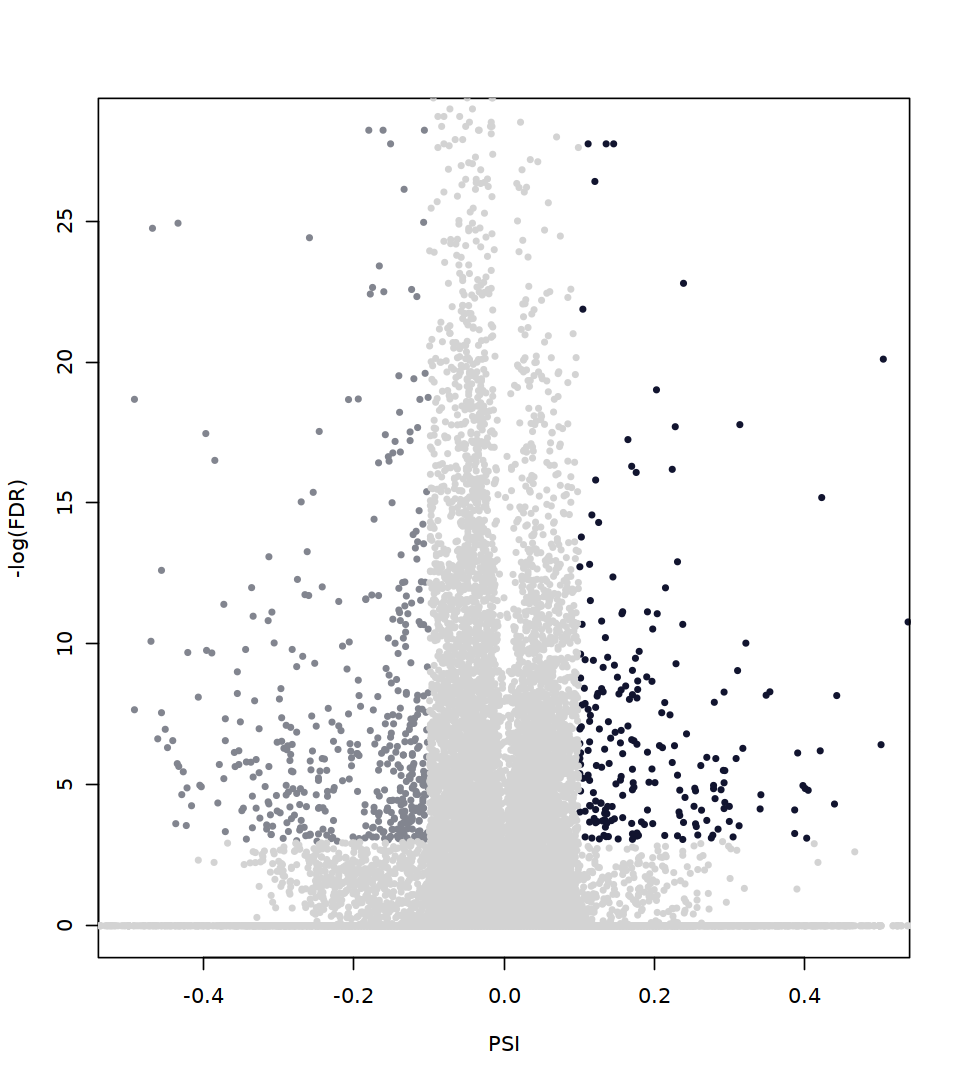

In [30]:
vol_plot_inp <- list(sig=HS.AdultAMLvsPedAML.JCEC[[5]][HS.AdultAMLvsPedAML.JCEC[[5]]$geneSymbol %in% 
                                                               RBFOX2_comb_targets &
HS.AdultAMLvsPedAML.JCEC[[5]]$FDR < 0.05 & HS.AdultAMLvsPedAML.JCEC[[5]]$IncLevelDifference > 0.1,],
                     sig_down=HS.AdultAMLvsPedAML.JCEC[[5]][HS.AdultAMLvsPedAML.JCEC[[5]]$geneSymbol %in% 
                                                               RBFOX2_comb_targets &
HS.AdultAMLvsPedAML.JCEC[[5]]$FDR < 0.05 & HS.AdultAMLvsPedAML.JCEC[[5]]$IncLevelDifference < -0.1,],
                notsig=HS.AdultAMLvsPedAML.JCEC[[5]][HS.AdultAMLvsPedAML.JCEC[[5]]$geneSymbol %in% 
                                                               RBFOX2_comb_targets &
HS.AdultAMLvsPedAML.JCEC[[5]]$FDR > 0.05 | abs(HS.AdultAMLvsPedAML.JCEC[[5]]$IncLevelDifference) < 0.1,])
vol_plot_inp[[1]]$FDR[vol_plot_inp[[1]]$FDR==0] <- min(vol_plot_inp[[1]]$FDR[vol_plot_inp[[1]]$FDR!=0])
vol_plot_inp[[2]]$FDR[vol_plot_inp[[2]]$FDR==0] <- min(vol_plot_inp[[2]]$FDR[vol_plot_inp[[2]]$FDR!=0])
vol_plot_inp[[3]]$FDR[vol_plot_inp[[3]]$FDR==0] <- min(vol_plot_inp[[3]]$FDR[vol_plot_inp[[3]]$FDR!=0])
options(repr.plot.width=8, repr.plot.height=9)
plot(vol_plot_inp[[1]]$IncLevelDifference, -log(vol_plot_inp[[1]]$FDR), pch=19, cex=0.5, 
     ylim=c(0, max(c(-log(vol_plot_inp[[1]]$FDR), -log(vol_plot_inp[[2]]$FDR)))), 
            col="#11142F", xlab="PSI", ylab="-log(FDR)", xlim=c(-0.5, 0.5))
points(vol_plot_inp[[2]]$IncLevelDifference, -log(vol_plot_inp[[2]]$FDR), pch=19, cex=0.5, col="#82858F")
points(vol_plot_inp[[3]]$IncLevelDifference, -log(vol_plot_inp[[3]]$FDR), pch=19, cex=0.5, col="light gray")

## Fig S5e - Volcano Plot (HPC)

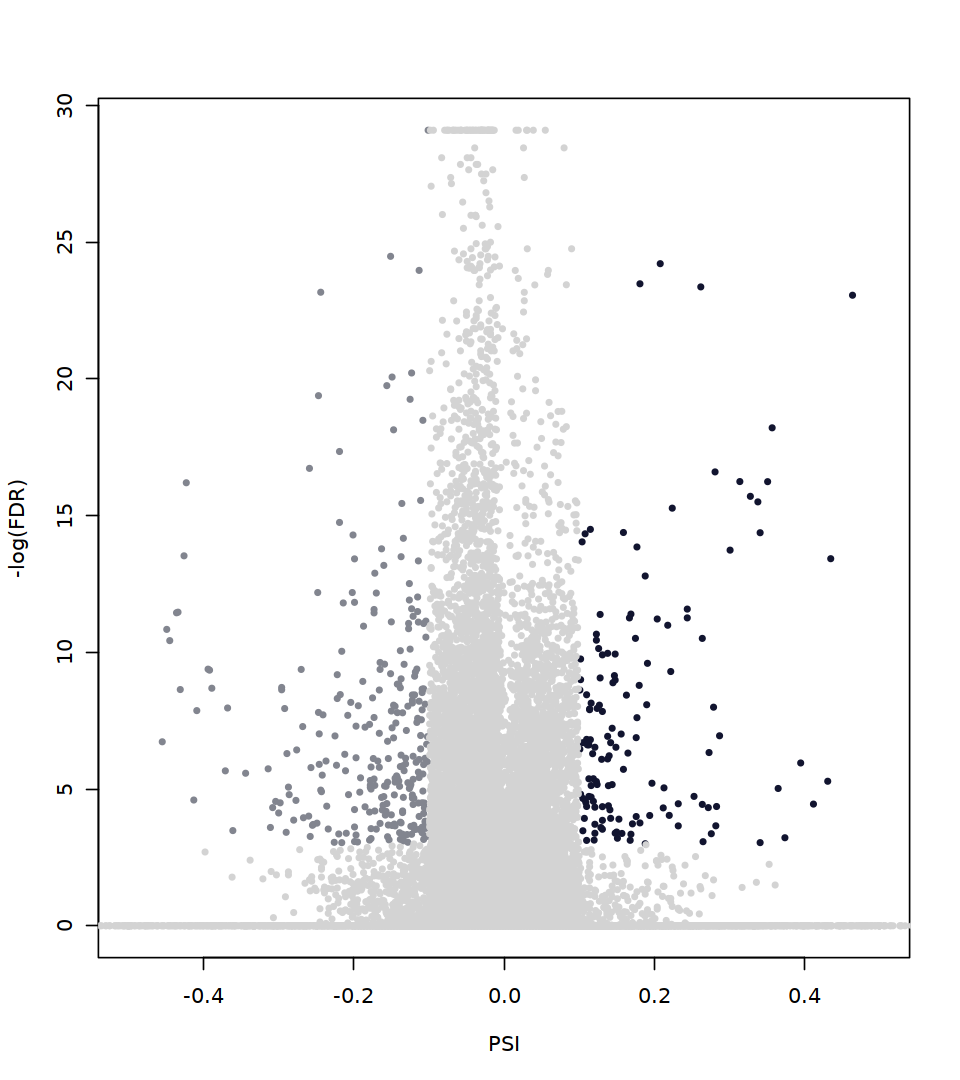

In [31]:
vol_plot_inp <- list(sig=Prog.AdultAMLvsPedAML.JCEC[[5]][Prog.AdultAMLvsPedAML.JCEC[[5]]$geneSymbol %in% 
                                                               RBFOX2_comb_targets &
Prog.AdultAMLvsPedAML.JCEC[[5]]$FDR < 0.05 & Prog.AdultAMLvsPedAML.JCEC[[5]]$IncLevelDifference > 0.1,],
                     sig_down=Prog.AdultAMLvsPedAML.JCEC[[5]][Prog.AdultAMLvsPedAML.JCEC[[5]]$geneSymbol %in% 
                                                               RBFOX2_comb_targets &
Prog.AdultAMLvsPedAML.JCEC[[5]]$FDR < 0.05 & Prog.AdultAMLvsPedAML.JCEC[[5]]$IncLevelDifference < -0.1,],
                notsig=Prog.AdultAMLvsPedAML.JCEC[[5]][Prog.AdultAMLvsPedAML.JCEC[[5]]$geneSymbol %in% 
                                                               RBFOX2_comb_targets &
Prog.AdultAMLvsPedAML.JCEC[[5]]$FDR > 0.05 | abs(Prog.AdultAMLvsPedAML.JCEC[[5]]$IncLevelDifference) < 0.1,])
vol_plot_inp[[1]]$FDR[vol_plot_inp[[1]]$FDR==0] <- min(vol_plot_inp[[1]]$FDR[vol_plot_inp[[1]]$FDR!=0])
vol_plot_inp[[2]]$FDR[vol_plot_inp[[2]]$FDR==0] <- min(vol_plot_inp[[2]]$FDR[vol_plot_inp[[2]]$FDR!=0])
vol_plot_inp[[3]]$FDR[vol_plot_inp[[3]]$FDR==0] <- min(vol_plot_inp[[3]]$FDR[vol_plot_inp[[3]]$FDR!=0])
options(repr.plot.width=8, repr.plot.height=9)
plot(vol_plot_inp[[1]]$IncLevelDifference, -log(vol_plot_inp[[1]]$FDR), pch=19, cex=0.5, 
     ylim=c(0, max(c(-log(vol_plot_inp[[1]]$FDR), -log(vol_plot_inp[[2]]$FDR)))), 
            col="#11142F", xlab="PSI", ylab="-log(FDR)", xlim=c(-0.5, 0.5))
points(vol_plot_inp[[2]]$IncLevelDifference, -log(vol_plot_inp[[2]]$FDR), pch=19, cex=0.5, col="#82858F")
points(vol_plot_inp[[3]]$IncLevelDifference, -log(vol_plot_inp[[3]]$FDR), pch=19, cex=0.5, col="light gray")

In [32]:
sessionInfo()

R version 4.0.5 (2021-03-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.2 LTS

Matrix products: default
BLAS/LAPACK: /home/ubuntu/anaconda3/lib/libmkl_rt.so.1

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] plyr_1.8.6                             
 [2] dplyr_1.0.7                            
 [3] reshape2_1.4.4                         
 [4] Homo.sapiens_1.3.1                     
 [5] TxDb.Hsapiens.UCSC.hg19.knownGene_3.2.2
 [6] org.Hs.eg.db_3.12.0                    
 [7] GO.db_3.12.1                           
 [8] OrganismDbi_1.32.0                     
